In [35]:
import pandas as pd
apple = pd.read_csv("/content/AAPL.csv")
print(apple.head())

         Date       Open       High        Low      Close  Adj Close     Volume
0  2019-12-09  67.500000  67.699997  66.227501  66.730003  65.621384  128042400
1  2019-12-10  67.150002  67.517502  66.464996  67.120003  66.004898   90420400
2  2019-12-11  67.202499  67.775002  67.125000  67.692497  66.567886   78756800
3  2019-12-12  66.945000  68.139999  66.830002  67.864998  66.737518  137310400
4  2019-12-13  67.864998  68.824997  67.732498  68.787498  67.644707  133587600


In [36]:
print("training days = ", apple.shape)

training days =  (253, 7)


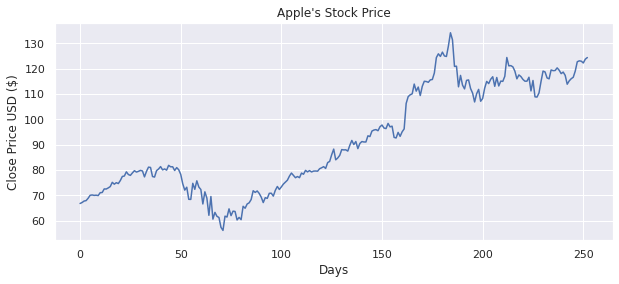

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.show()

In [40]:
apple = apple[["Close"]]
print(apple.head())

       Close
0  66.730003
1  67.120003
2  67.692497
3  67.864998
4  68.787498


In [42]:
futureDays = 25

apple["Prediction"] = apple[["Close"]].shift(-futureDays)
print(apple.head())
print(apple.tail())

       Close  Prediction
0  66.730003   77.834999
1  67.120003   78.809998
2  67.692497   79.682503
3  67.864998   79.142502
4  68.787498   79.425003
          Close  Prediction
248  123.080002         NaN
249  122.940002         NaN
250  122.250000         NaN
251  123.750000         NaN
252  124.379997         NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
import numpy as np
x = np.array(apple.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[ 66.730003]
 [ 67.120003]
 [ 67.692497]
 [ 67.864998]
 [ 68.787498]
 [ 69.964996]
 [ 70.102501]
 [ 69.934998]
 [ 70.004997]
 [ 69.860001]
 [ 71.      ]
 [ 71.067497]
 [ 72.477501]
 [ 72.449997]
 [ 72.879997]
 [ 73.412498]
 [ 75.087502]
 [ 74.357498]
 [ 74.949997]
 [ 74.597504]
 [ 75.797501]
 [ 77.407501]
 [ 77.582497]
 [ 79.239998]
 [ 78.169998]
 [ 77.834999]
 [ 78.809998]
 [ 79.682503]
 [ 79.142502]
 [ 79.425003]
 [ 79.807503]
 [ 79.577499]
 [ 77.237503]
 [ 79.422501]
 [ 81.084999]
 [ 80.967499]
 [ 77.377502]
 [ 77.165001]
 [ 79.712502]
 [ 80.362503]
 [ 81.302498]
 [ 80.0075  ]
 [ 80.387497]
 [ 79.902496]
 [ 81.800003]
 [ 81.217499]
 [ 81.237503]
 [ 79.75    ]
 [ 80.904999]
 [ 80.074997]
 [ 78.262497]
 [ 74.544998]
 [ 72.019997]
 [ 73.162498]
 [ 68.379997]
 [ 68.339996]
 [ 74.702499]
 [ 72.330002]
 [ 75.684998]
 [ 73.230003]
 [ 72.2575  ]
 [ 66.542503]
 [ 71.334999]
 [ 68.857498]
 [ 62.057499]
 [ 69.4925  ]
 [ 60.552502]
 [ 63.215   ]
 [ 61.6675  ]
 [ 61.195   ]
 [ 57.310001]
 [ 56.

In [45]:
y = np.array(apple["Prediction"])[:-futureDays]
print(y)

[ 77.834999  78.809998  79.682503  79.142502  79.425003  79.807503
  79.577499  77.237503  79.422501  81.084999  80.967499  77.377502
  77.165001  79.712502  80.362503  81.302498  80.0075    80.387497
  79.902496  81.800003  81.217499  81.237503  79.75      80.904999
  80.074997  78.262497  74.544998  72.019997  73.162498  68.379997
  68.339996  74.702499  72.330002  75.684998  73.230003  72.2575
  66.542503  71.334999  68.857498  62.057499  69.4925    60.552502
  63.215     61.6675    61.195     57.310001  56.092499  61.720001
  61.380001  64.610001  61.935001  63.702499  63.572498  60.227501
  61.232498  60.352501  65.6175    64.857498  66.517502  66.997498
  68.3125    71.762497  71.107498  71.672501  70.699997  69.232498
  67.092499  69.025002  68.7575    70.7425    70.792503  69.644997
  71.932503  73.449997  72.267502  73.290001  74.389999  75.157501
  75.934998  77.532501  78.752502  77.852501  76.912498  77.385002
  76.927498  78.739998  78.285004  79.807503  79.212502  79.7225

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [47]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

In [48]:
# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [49]:
xfuture = apple.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[114.089996]
 [115.809998]
 [116.790001]
 [113.019997]
 [116.5     ]
 [113.160004]
 [115.080002]
 [114.970001]
 [116.970001]
 [124.400002]
 [121.099998]
 [121.190002]
 [120.709999]
 [119.019997]
 [115.980003]
 [117.510002]
 [116.870003]
 [115.75    ]
 [115.040001]
 [115.050003]
 [116.599998]
 [111.199997]
 [115.32    ]
 [108.860001]
 [108.769997]]


In [50]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [112.       116.589996 123.080002 118.690002 123.080002 118.690002
 119.489998 119.209999 121.190002 120.300003 119.389999 118.029999
 118.639999 117.339996 113.849998 115.169998 123.080002 116.589996
 119.050003 122.720001 123.080002 122.940002 122.25     112.82
 124.379997]


In [51]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [115.60356699 117.12076841 117.98522202 114.65972854 117.72941422
 114.78322771 116.47684417 116.37981308 118.14399873 124.69794931
 121.78703946 121.86643134 121.44302414 119.9522855  117.2707286
 118.62032974 118.05579121 117.0678446  116.44155958 116.45038227
 117.81762174 113.0543196  116.68854469 110.99022592 110.91083404]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


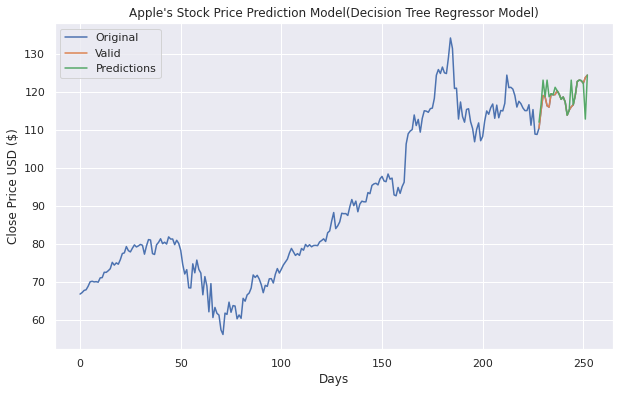

In [52]:
predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


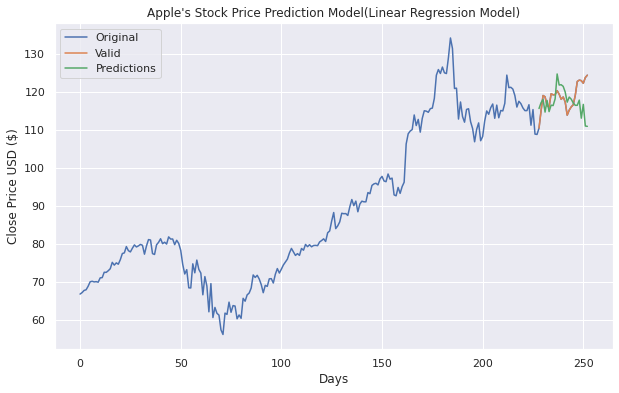

In [53]:
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()